In [112]:
import umap
import numpy 
import seaborn as sns
import umap.plot
import random
import matplotlib.pyplot as plt
from itertools import product, combinations

In [37]:
draftsmen=['A', 'J', 'C', 'M', 'K']
drawings = [1,2,3,4]
alldrawings = product(draftsmen,drawings)
alldrawings = list(alldrawings)

In [109]:
alldrawings

[('A', 1),
 ('A', 2),
 ('A', 3),
 ('A', 4),
 ('J', 1),
 ('J', 2),
 ('J', 3),
 ('J', 4),
 ('C', 1),
 ('C', 2),
 ('C', 3),
 ('C', 4),
 ('M', 1),
 ('M', 2),
 ('M', 3),
 ('M', 4),
 ('K', 1),
 ('K', 2),
 ('K', 3),
 ('K', 4)]

In [99]:
def draftsmenVec(char):
    switcher = {
        0: 'A',
        1: 'J',
        2: 'C',
        3: 'M',
        4: 'K'
    }
    inv_switcher = {v: k for k, v in switcher.items()}
    assert char in inv_switcher
    vec = numpy.zeros(5)
    vec[inv_switcher.get(char)] = 1
    return vec

def drawingVec(i):
    assert i >0 
    assert i <= 4
    vec = numpy.zeros(4)
    vec[i-1] = 1
    return vec
    
def authoredDrawing(ad):
    v1 = draftsmenVec(ad[0])
    v2 = drawingVec(ad[1])
    return numpy.hstack([v1,v2])
    
def tile(ads):
    v1 = authoredDrawing(ads[0])
    v2 = authoredDrawing(ads[1])
    return numpy.hstack([v1,v2])
    
def tiles():
    alldrawings = product(draftsmen,drawings)
    alldrawings = list(alldrawings)
    allpairs = list(map(tile, filter(lambda x: x[0] != x[1], list(combinations(alldrawings, 2)))))
    return numpy.vstack(allpairs)
    

In [100]:
data = tiles()

In [101]:
mapper = umap.UMAP(densmap=False, n_neighbors=5, random_state=42,n_components=2)

In [102]:
clusterable_embedding = mapper.fit_transform(data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

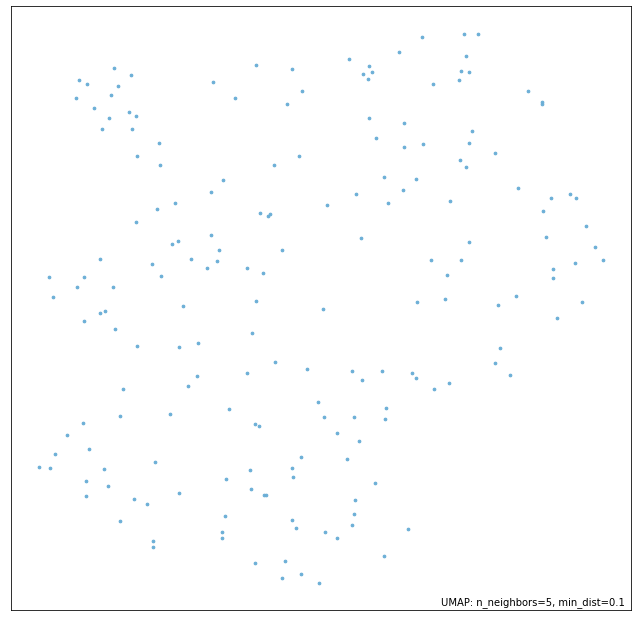

In [103]:
umap.plot.points(mapper)

In [104]:
numpy.unique(data, axis=0).shape

(190, 18)

In [105]:
embed = numpy.dot(data, numpy.random.uniform(0,1,(18,2)).reshape(18,2))

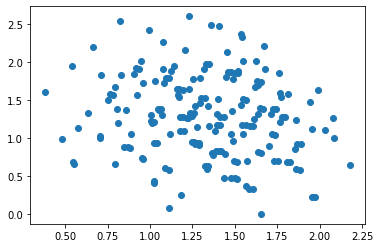

In [106]:
d = embed - embed.min().T
plt.scatter(d[:, 0], d[:, 1])

In [107]:
embed.shape

(190, 2)

In [108]:
embed

array([[1.90294033, 2.90804976],
       [2.12342433, 2.43741423],
       [2.03312905, 2.79869018],
       [2.30075581, 2.71194428],
       [2.71088578, 2.77428529],
       [2.93136978, 2.30364976],
       [2.8410745 , 2.66492571],
       [1.70819683, 2.39735451],
       [2.1183268 , 2.45969551],
       [2.33881079, 1.98905999],
       [2.24851552, 2.35033593],
       [1.9908808 , 2.98916135],
       [2.40101077, 3.05150236],
       [2.62149476, 2.58086683],
       [2.53119949, 2.94214278],
       [2.07688157, 2.2919551 ],
       [2.48701154, 2.35429611],
       [2.70749554, 1.88366058],
       [2.61720026, 2.24493653],
       [2.44215622, 1.84978415],
       [2.35186095, 2.2110601 ],
       [2.61948771, 2.1243142 ],
       [3.02961768, 2.1866552 ],
       [3.25010167, 1.71601968],
       [3.1598064 , 2.07729563],
       [2.02692873, 1.80972442],
       [2.4370587 , 1.87206543],
       [2.65754269, 1.4014299 ],
       [2.56724742, 1.76270585],
       [2.3096127 , 2.40153127],
       [2.

In [126]:
def toString(a):
    a1, a2 =(a[0], a[1])
    return "".join([a1[0],str(a1[1]), "_",a2[0],str(a2[1])])

l = list(combinations(alldrawings, 2))
random.shuffle(l)
print("\n".join(list(map(toString, l))))

C3_M4
A3_M4
C4_M3
C1_K3
A1_J4
A1_M2
M1_K3
M3_M4
C3_K4
J4_K3
A2_M1
C1_M1
M4_K3
A1_M4
J4_M1
M1_M3
J3_K4
M1_K1
C4_M1
A3_C2
A1_J2
A1_K4
J1_J2
J4_C2
C2_K4
A2_K1
J2_K3
J4_M4
A3_M2
M3_K4
A3_J3
A1_C2
A2_M4
C2_M4
J1_K2
A4_J4
A1_K3
A3_K1
M1_K4
C2_M3
A4_C4
C3_M3
A2_C4
A1_A2
A1_K1
J3_C2
J1_M1
C2_K2
A3_C4
C2_C3
A1_C1
J3_J4
A3_J4
M3_K2
A1_C4
A1_K2
A2_A4
C4_M4
A4_C2
J3_C4
C1_K2
A4_M1
M1_M4
J2_C3
A4_M3
M4_K4
A3_J1
A3_K2
A2_C1
C4_K4
J1_K3
K2_K4
M4_K2
A3_A4
A3_J2
A4_K2
A1_C3
C3_K2
J4_M3
A1_A4
C2_M2
M2_M3
K1_K2
J2_C2
M3_K1
M3_K3
A4_M4
A1_A3
J4_C3
A1_J3
A3_M3
M1_M2
C2_C4
M2_K3
C1_K4
J4_M2
J1_C2
C2_K1
A4_K1
C4_M2
A2_C3
A2_J4
J4_K4
J3_K3
J1_C3
M4_K1
C3_M1
C1_C2
J3_K2
A4_J2
K2_K3
J4_C4
C1_C4
J4_K1
A4_C3
J1_K4
C3_K1
J2_C1
A1_J1
A2_K3
J4_C1
A2_J1
A2_K2
J1_M3
A3_C1
A2_M2
C1_M2
M2_K2
M2_M4
J1_C1
J1_K1
A3_C3
J2_C4
J2_M4
A3_K4
J2_M1
J1_J4
J2_M3
C1_M4
A4_J1
J3_M1
A4_K4
J1_J3
C1_K1
C4_K2
A2_J3
C3_M2
J2_K2
C1_C3
A2_K4
A2_C2
J1_M4
A4_M2
A2_M3
J3_M4
A4_C1
C1_M3
C4_K3
C3_K3
A1_M3
C2_K3
K1_K4
J3_C1
A1_M1
K3_K4
J3_K1
K1_K